Vinhos tintos e brancos possuem classificações completamente diferentes quanto a sua classificação e presença de outras estruturas moleculares.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data_red = pd.read_csv('winequality-red.csv', delimiter = ';')

In [3]:
raw_data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
raw_data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Entendendo os dados

 Dados obtidos a partir do site: https://archive.ics.uci.edu/ml/datasets/wine+quality
 
 Referência: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
 
 Parâmetros utilizados:
 
 - fixed acidity: concentração de ácidos não voláteis. Os ácidos predominantes são: ácido tartárico, ácido málico, ácido cítrico e ácido succínico.
 - volatile acidity: concentração de ácidos voláteis. Os ácidos predominantes são: principalmente ácido acético, mas também, ácido lático, ácido fórmico, ácido butanóico e ácido propanóico.
 - citric acid: um dos tipos de ácido fixos.
 - residual sugar: açúcar residual que sobrou após o processo de fermentação de vinho terminar. 
 - chlorides: sal de ClO3-. Está dissolvido no vinho.
 - free sulfur dioxide: medida da quantidade de SO2 presente que não se encontra ligada a outras moléculas do vinho.
 - total sulfur dioxide: medida da quantidade total de SO2 presente no vinho.
 - density: densidade do vinho. A densidade é determinada principalmente pela concentração de açúcar e outros sólidos dissolvidos no vinho.
 - pH: valores típcos para o pH do vinho são entre 3.0 e 4.0 na escala de pH. Dentre os dados fornecidos, o valor de pH possui uma influência maior nos valores de S02.
 - sulphates: sal de SO4-2. Está dissolvido no vinho.
 - alcohol: Também conhecido como conteúdo alcóolico. Etanol é o principal álcool encontrado em vinhos. Etanol é um componente crítico do vinho e é produzido a partir do açúcar durante a fermentação. A concentração de etanol no vinho pode afetar o paladar, atividade microbiana, a solubilidade dos componentes e o valor das taxas aplicadas sobre o vinho.
 - quality: avaliação quanto a qualidade do vinho. 0 indica um vinho muito ruim e 10 indica um vinho muito bom.

In [5]:
raw_data_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


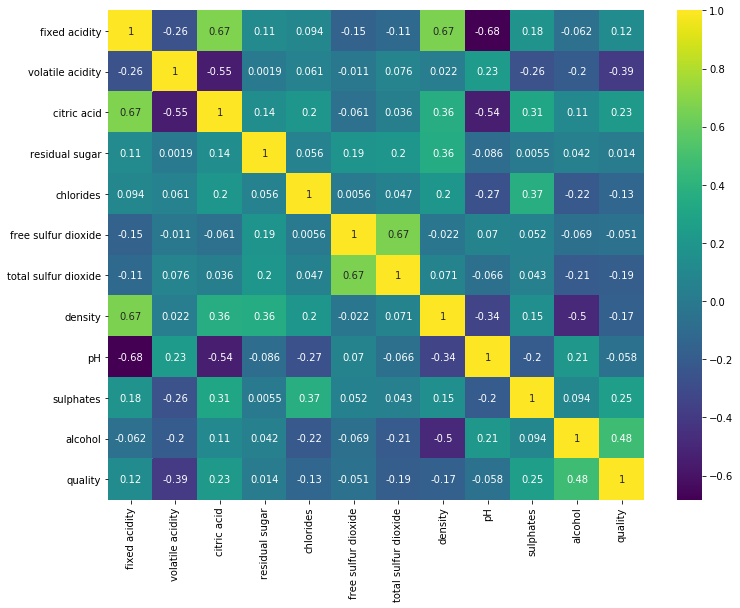

In [6]:
plt.figure(figsize=(12,9))
sns.heatmap(raw_data_red.corr(), cmap = 'viridis', annot = True)

In [7]:
# Como ácido cítrico é um dos tipos de ácidos fixos, podemos separar dos outros ácidos fixos da quantidade de ácido cítrico.
# A alta correlação entre ambos os valores explica essa informação repetida em duas colunas.

In [8]:
raw_data_red['other_fixed_acid'] = raw_data_red['fixed acidity'] - raw_data_red['citric acid']

In [9]:
# Free e total sulfur dioxide também mascaram uma informação repetida. Vamos separar ambos os dados.

In [10]:
raw_data_red['bounded SO2'] = raw_data_red['total sulfur dioxide'] - raw_data_red['free sulfur dioxide']

In [11]:
# Agora podemos eliminar as duas colunas que não são necessárias

In [12]:
red_wine_raw = raw_data_red.drop(['fixed acidity', 'total sulfur dioxide'], axis=1)

In [13]:
red_wine_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   volatile acidity     1599 non-null   float64
 1   citric acid          1599 non-null   float64
 2   residual sugar       1599 non-null   float64
 3   chlorides            1599 non-null   float64
 4   free sulfur dioxide  1599 non-null   float64
 5   density              1599 non-null   float64
 6   pH                   1599 non-null   float64
 7   sulphates            1599 non-null   float64
 8   alcohol              1599 non-null   float64
 9   quality              1599 non-null   int64  
 10  other_fixed_acid     1599 non-null   float64
 11  bounded SO2          1599 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
red_wine_raw.corr()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,other_fixed_acid,bounded SO2
volatile acidity,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.209267,0.097034
citric acid,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.364947,-0.541904,0.312770,0.109903,0.226373,0.602894,0.066776
residual sugar,0.001918,0.143577,1.000000,0.055610,0.187049,0.355283,-0.085652,0.005527,0.042075,0.013732,0.106308,0.174529
chlorides,0.061298,0.203823,0.055610,1.000000,0.005562,0.200632,-0.265026,0.371260,-0.221141,-0.128907,0.076356,0.055480
free sulfur dioxide,-0.010504,-0.060978,0.187049,0.005562,1.000000,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.158280,0.425149
density,0.022026,0.364947,0.355283,0.200632,-0.021946,1.000000,-0.341699,0.148506,-0.496180,-0.174919,0.675476,0.095135
pH,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.670233,-0.108053
sulphates,-0.260987,0.312770,0.005527,0.371260,0.051658,0.148506,-0.196648,1.000000,0.093595,0.251397,0.159400,0.032244
alcohol,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.496180,0.205633,0.093595,1.000000,0.476166,-0.079656,-0.223203
quality,-0.390558,0.226373,0.013732,-0.128907,-0.050656,-0.174919,-0.057731,0.251397,0.476166,1.000000,0.106320,-0.205463


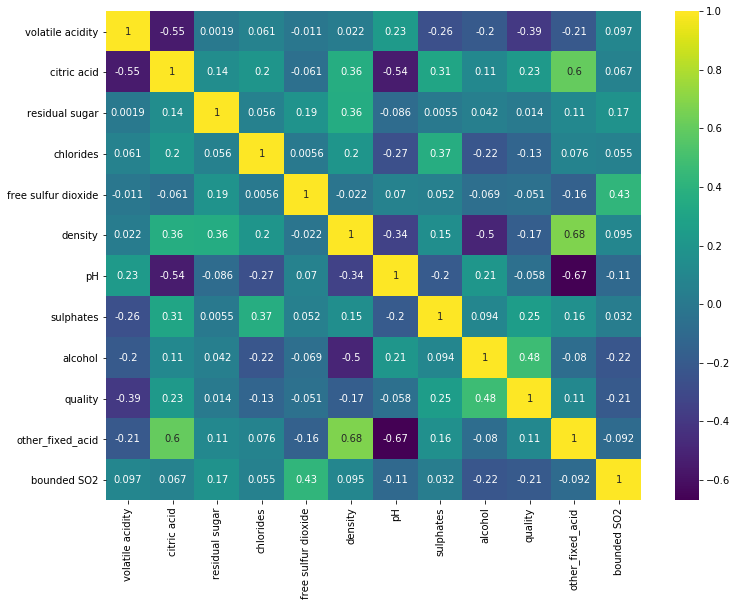

In [15]:
plt.figure(figsize=(12,9))
sns.heatmap(red_wine_raw.corr(), cmap = 'viridis', annot = True)

## Analisando a distribuição da qualidade

In [16]:
red_wine_raw['quality'].sort_values().unique()

array([3, 4, 5, 6, 7, 8], dtype=int64)

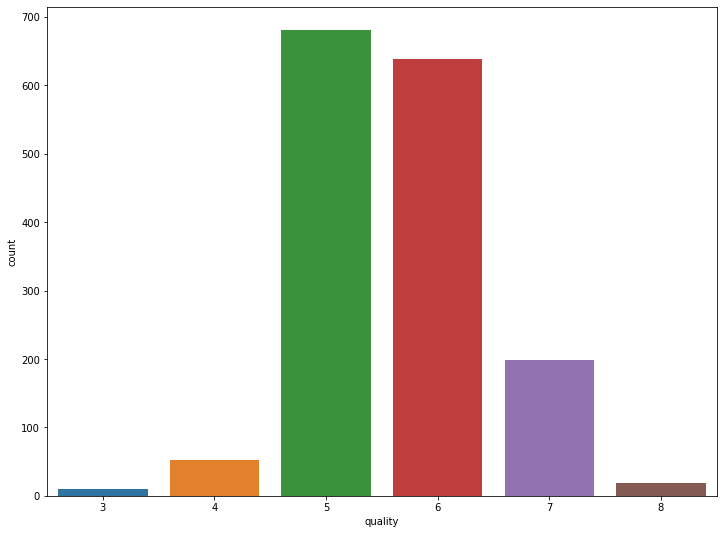

In [17]:
plt.figure(figsize=(12,9))
sns.countplot(x='quality', data=red_wine_raw)

In [18]:
## O dataset está completamente desbalanceado. Vamos investigar a quantidade de cada avaliação de qualidade presente.

In [19]:
for i in range(3,9):
    print('Existem ' + str(len(red_wine_raw[red_wine_raw['quality']==i])) + ' dados com avaliação de qualidade ' + str(i))

Existem 10 dados com avaliação de qualidade 3
Existem 53 dados com avaliação de qualidade 4
Existem 681 dados com avaliação de qualidade 5
Existem 638 dados com avaliação de qualidade 6
Existem 199 dados com avaliação de qualidade 7
Existem 18 dados com avaliação de qualidade 8


In [20]:
## Existem muito poucos dados de qualidade 3 e 8, portanto vamos retirá-los da investigação e nos concentrar em métodos
##    onde nosso programa conseguirá classificar vinhos com qualidades entre 4 e 7.

In [21]:
red_wine = red_wine_raw[(red_wine_raw['quality']>3)&(red_wine_raw['quality']<8)]

In [22]:
## Agora vamos seguir 4 caminhos diferentes:
##    - não realizar qualquer over ou undersampling
##    - realizar um oversampling dos vinhos de qualidade 4 e um undersampling dos vinhos de qualidade 5 e 6, 
##    para que tenhamos 199 vinhos em cada categoria;
##    - eliminar os vinhos de qualidade 4 e realizar um undersampling dos vinhos de qualidade 5 e 6
##    - eliminar os vinhos de qualidade 4 e realizar um oversampling dos vinhos de qualidade 6 e 7
## Nosso objetivo será descobrir qual dos modelos apresenta uma accuracy melhor e também aqueles que não tendem a 
##    supervalorizar a qualidade de um vinho.

## Verificando a presença de outliers

In [23]:
# Alcohol

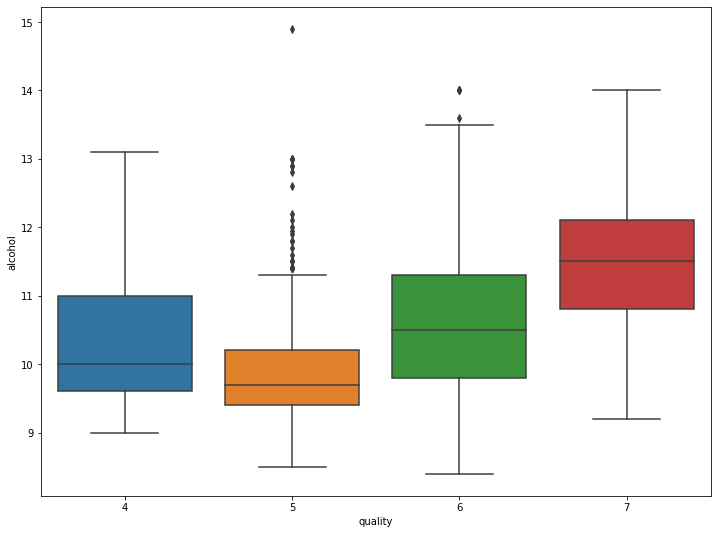

In [24]:
plt.figure(figsize=(12,9))
sns.boxplot(y='alcohol', data=red_wine, x='quality')

In [25]:
red_wine_1 = red_wine[(red_wine['quality']==5) & (red_wine['alcohol']<11.5) | (red_wine['quality'] != 5)]

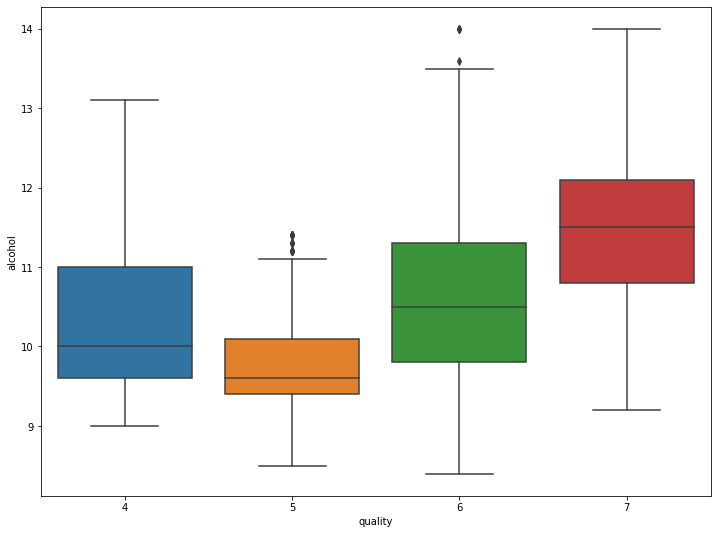

In [26]:
plt.figure(figsize=(12,9))
sns.boxplot(y='alcohol', data=red_wine_1, x='quality')

In [27]:
# Volatile acidity

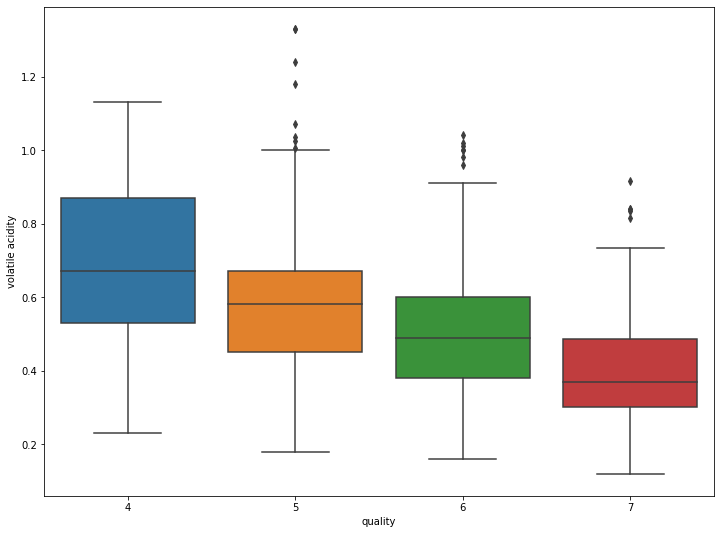

In [28]:
plt.figure(figsize=(12,9))
sns.boxplot(y='volatile acidity', data=red_wine_1, x='quality')

In [29]:
red_wine_2 = red_wine_1[(red_wine_1['quality']==4) | 
                        (red_wine_1['quality']==5) & (red_wine_1['volatile acidity']<1.0) | 
                        (red_wine_1['quality'] == 6) & (red_wine_1['volatile acidity']< 0.9) |
                        (red_wine_1['quality'] == 7) & (red_wine_1['volatile acidity']< 0.8)]

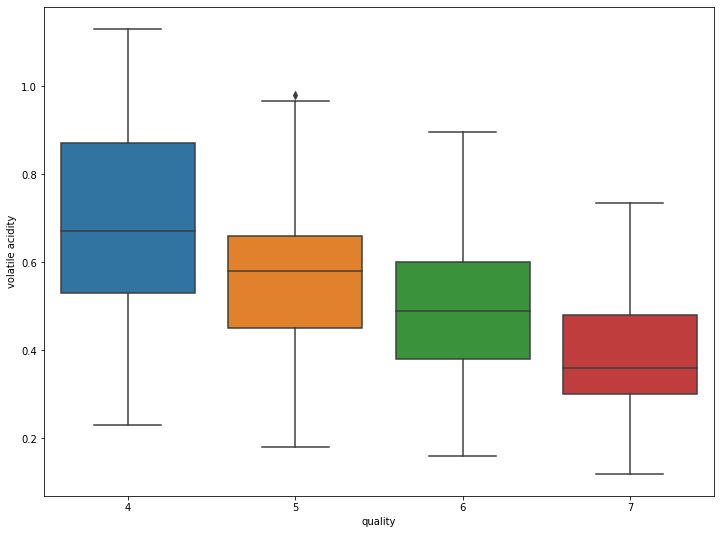

In [30]:
plt.figure(figsize=(12,9))
sns.boxplot(y='volatile acidity', data=red_wine_2, x='quality')

In [31]:
# Sulphates

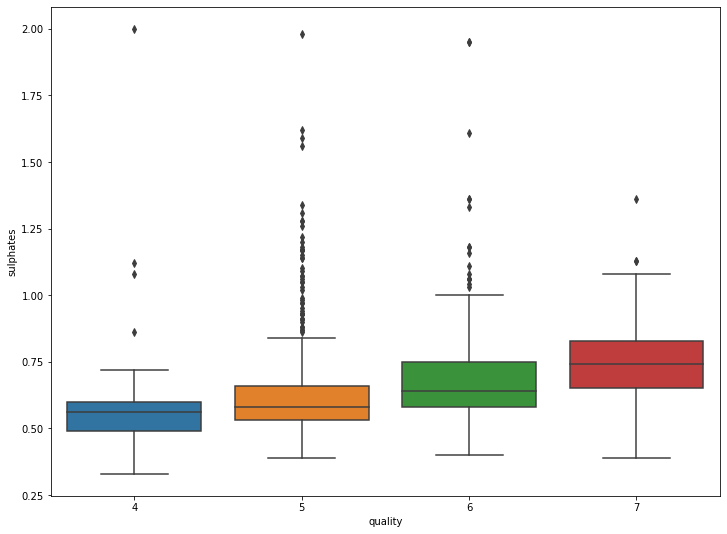

In [32]:
plt.figure(figsize=(12,9))
sns.boxplot(y='sulphates', data=red_wine_2, x='quality')

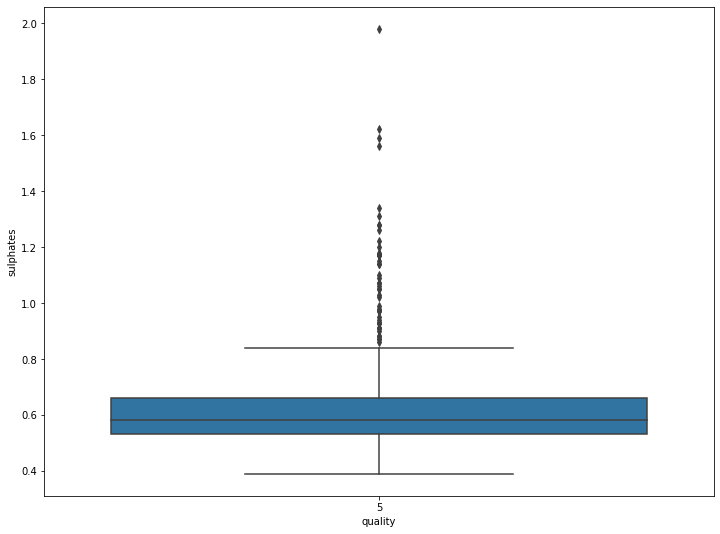

In [33]:
plt.figure(figsize=(12,9))
sns.boxplot(y='sulphates', data=red_wine_2[red_wine_2['quality']==5], x='quality')

In [34]:
red_wine_3 = red_wine_2[(red_wine_2['quality'] == 4) & (red_wine_2['sulphates']< 0.75) | 
                        (red_wine_2['quality'] == 5) & (red_wine_2['sulphates']< 0.85) | 
                        (red_wine_2['quality'] == 6) & (red_wine_2['sulphates']< 1.0) |
                        (red_wine_2['quality'] == 7) & (red_wine_2['sulphates']< 1.0)]

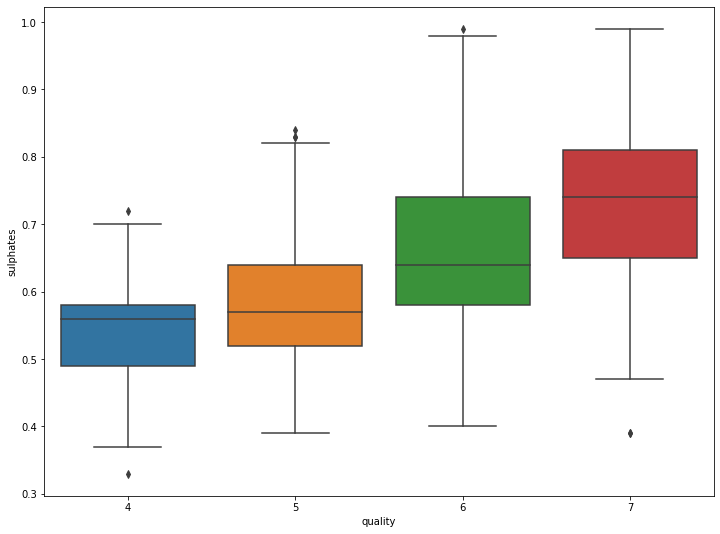

In [35]:
plt.figure(figsize=(12,9))
sns.boxplot(y='sulphates', data=red_wine_3, x='quality')

In [36]:
# Citric Acid

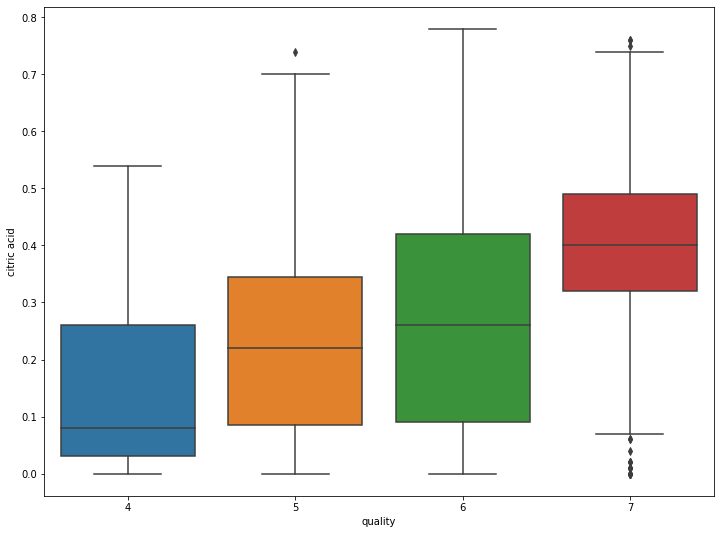

In [37]:
plt.figure(figsize=(12,9))
sns.boxplot(y='citric acid', data=red_wine_3, x='quality')

In [38]:
red_wine_4 = red_wine_3[(red_wine_3['quality'] == 4) | 
                        (red_wine_3['quality'] == 5) & (red_wine_3['citric acid'] < 0.71) | 
                        (red_wine_3['quality'] == 6) |
                        (red_wine_3['quality'] == 7) & (red_wine_3['citric acid'] > 0.08)]

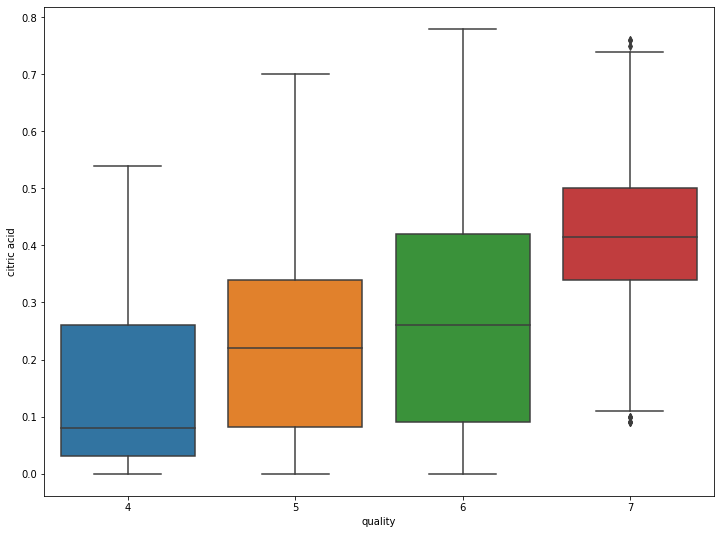

In [39]:
plt.figure(figsize=(12,9))
sns.boxplot(y='citric acid', data=red_wine_4, x='quality')

In [40]:
# Bounded SO2

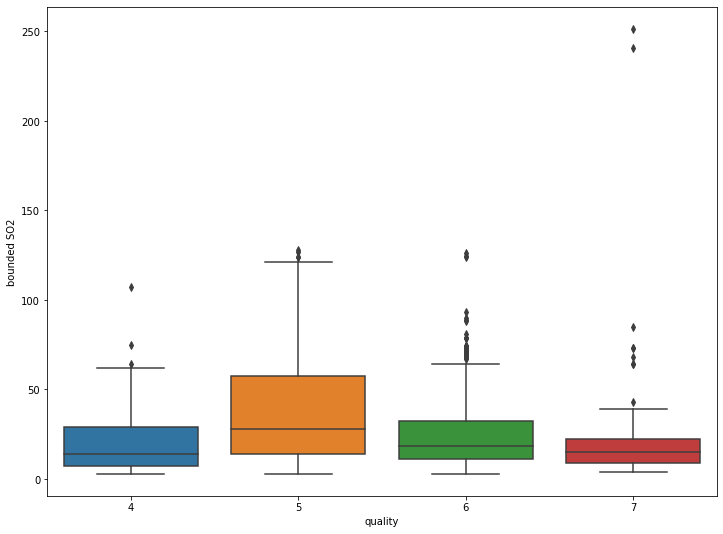

In [41]:
plt.figure(figsize=(12,9))
sns.boxplot(y='bounded SO2', data=red_wine_4, x='quality')

In [42]:
red_wine_5 = red_wine_4[(red_wine_4['quality'] == 4) & (red_wine_4['bounded SO2']< 60) | 
                        (red_wine_4['quality'] == 5) & (red_wine_4['bounded SO2']< 125) | 
                        (red_wine_4['quality'] == 6) & (red_wine_4['bounded SO2']< 60) |
                        (red_wine_4['quality'] == 7) & (red_wine_4['bounded SO2']< 50)]

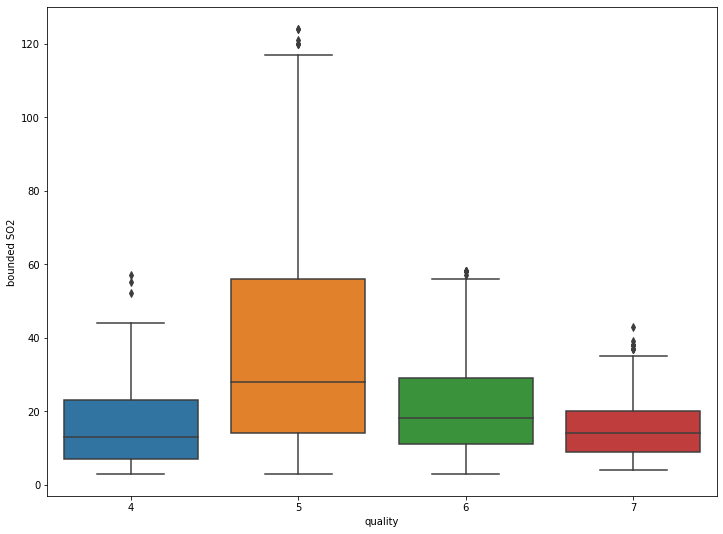

In [43]:
plt.figure(figsize=(12,9))
sns.boxplot(y='bounded SO2', data=red_wine_5, x='quality')

In [44]:
red_wine_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1373 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   volatile acidity     1373 non-null   float64
 1   citric acid          1373 non-null   float64
 2   residual sugar       1373 non-null   float64
 3   chlorides            1373 non-null   float64
 4   free sulfur dioxide  1373 non-null   float64
 5   density              1373 non-null   float64
 6   pH                   1373 non-null   float64
 7   sulphates            1373 non-null   float64
 8   alcohol              1373 non-null   float64
 9   quality              1373 non-null   int64  
 10  other_fixed_acid     1373 non-null   float64
 11  bounded SO2          1373 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 179.4 KB


### Train-test-split

In [45]:
X = red_wine_5.drop('quality', axis=1)
y = red_wine_5['quality']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

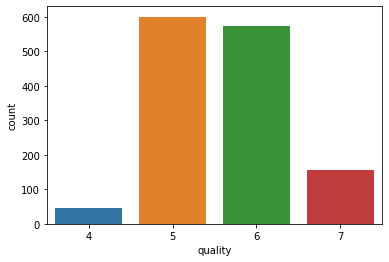

In [48]:
sns.countplot(y)

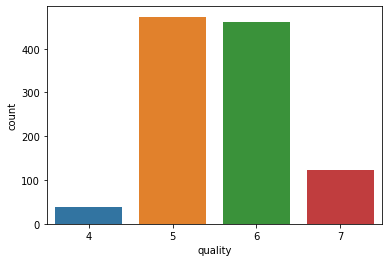

In [49]:
sns.countplot(y_train)

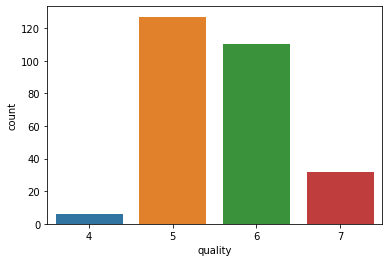

In [50]:
sns.countplot(y_test)

In [51]:
# Podemos perceber que um pouco mais dos categorias 7 e 6 acabaram caindo no grupo de teste, então vamos verificar como o
## algoritmo irá lidar com isso.

### Escalando as variáves

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
X_train_scaled = scaler.fit_transform(X_train)

In [55]:
X_test_scaled = scaler.transform(X_test)

### Modelo 1: SVC

In [56]:
from sklearn.svm import SVC, SVR

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid_svc = {'C':[0.1, 1, 10, 100, 1000, 10000],
    'gamma':[10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}

In [59]:
grid_svc = GridSearchCV(SVC(), param_grid_svc, verbose=1)

In [60]:
grid_svc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:   13.9s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
             verbose=1)

In [61]:
grid_svc.best_params_

{'C': 1, 'gamma': 1}

In [62]:
grid_svc.best_estimator_

SVC(C=1, gamma=1)

In [63]:
svc_pred = grid_svc.predict(X_test_scaled)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
print(classification_report(y_test, svc_pred))
print('\n')
print(confusion_matrix(y_test, svc_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.82      0.70      0.76       127
           6       0.61      0.85      0.71       110
           7       0.87      0.41      0.55        32

    accuracy                           0.71       275
   macro avg       0.58      0.49      0.51       275
weighted avg       0.73      0.71      0.70       275



[[ 0  2  4  0]
 [ 0 89 37  1]
 [ 0 16 93  1]
 [ 0  1 18 13]]


C:\Users\gabri\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Modelo 2: Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [67]:
param_grid_rf = {'n_estimators':[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [68]:
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, verbose=1)

In [69]:
grid_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             verbose=1)

In [70]:
grid_rf.best_params_

{'n_estimators': 400}

In [71]:
grid_rf.best_estimator_

RandomForestClassifier(n_estimators=400)

In [72]:
rf_pred = grid_rf.predict(X_test_scaled)

In [73]:
print(classification_report(y_test, rf_pred))
print('\n')
print(confusion_matrix(y_test, rf_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.83      0.82      0.82       127
           6       0.68      0.78      0.73       110
           7       0.70      0.50      0.58        32

    accuracy                           0.75       275
   macro avg       0.55      0.53      0.53       275
weighted avg       0.74      0.75      0.74       275



[[  0   3   3   0]
 [  0 104  22   1]
 [  0  18  86   6]
 [  0   1  15  16]]


C:\Users\gabri\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Oversampling dos vinhos de qualidade 4 e undersampling dos vinhos de qualidade 5 e 6.

In [87]:
len(y_train[y_train==7])

124

In [89]:
enn = EditedNearestNeighbours('not minority', 3)

C:\Users\gabri\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=not minority, n_neighbors=3 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [90]:
X_enn, y_enn = enn.fit_resample(X_train_scaled, y_train)

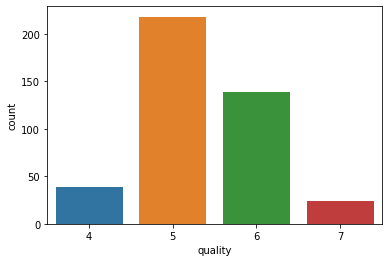

In [91]:
sns.countplot(y_enn)

In [92]:
from imblearn.over_sampling import ADASYN

In [93]:
ada = ADASYN('not majority')

C:\Users\gabri\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=not majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [94]:
X_ada, y_ada = ada.fit_resample(X_enn, y_enn)

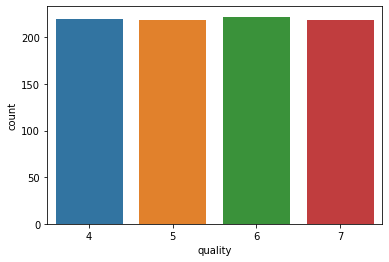

In [95]:
sns.countplot(y_ada)

### Modelo 1: SVC

In [103]:
ada_svc = SVC(gamma=1)

In [104]:
ada_svc.fit(X_ada, y_ada)

SVC(gamma=1)

In [105]:
ada_svc_pred = ada_svc.predict(X_test_scaled)

In [106]:
print(classification_report(y_test, ada_svc_pred))
print('\n')
print(confusion_matrix(y_test, ada_svc_pred))

              precision    recall  f1-score   support

           4       0.12      0.17      0.14         6
           5       0.53      0.83      0.64       127
           6       0.64      0.37      0.47       110
           7       1.00      0.09      0.17        32

    accuracy                           0.55       275
   macro avg       0.57      0.36      0.36       275
weighted avg       0.62      0.55      0.51       275



[[  1   4   1   0]
 [  5 105  17   0]
 [  2  67  41   0]
 [  0  24   5   3]]
